# SU(2) Bosonic BMN

## Use `qutip`: check versioning

In [1]:
# check versioning
from qutip.ipynbtools import version_table
version_table()

Software,Version
QuTiP,4.5.3
Numpy,1.20.1
SciPy,1.6.1
matplotlib,3.3.4
Cython,0.29.22
Number of CPUs,6
BLAS Info,Generic
IPython,7.21.0
Python,"3.9.2 | packaged by conda-forge | (default, Feb 21 2021, 05:02:46) [GCC 9.3.0]"
OS,posix [linux]


In [2]:
from qutip import *

## The Fock basis

In [3]:
import numpy as np

Define the dimension of the Fock space. This should be small enough to use existing quantum hardware. The dimension of the Fock space (or the cutoff) is equal to the number of qubits we can use.

We call the cutoff $\Lambda$ in the notes. Here we use $L$ instead

In [4]:
# for L=5 we will have each boson represented as a 5x5 matrix
# qutip stores operators as sparse matrices
L = 8

For the *bosonic* mini-BMN model with group SU(2) we have $2^2-1=3$ bosonic degrees of freedom per matrix. We consider the 2 matrix case, so we will have 6 bosons in total.

In the future it would be best to disentangle the number of matrices of the model (2) from the generators of the gauge group (3).

In [5]:
# for Nmat=6 and the SU(2) case, that means we are considering the BMN model with 2 matrices
Nmat = 6

To construct each bosonic annihilation operator we start from the $L \times L$ annihiliation operator in the Fock basis of one boson and then use the outer product with the identity. 

* annihilation operator for one harmonic oscillator in a space truncated to L levels

In [6]:
a = destroy(L)
print(a)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = False
Qobj data =
[[0.         1.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         2.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  2.44948974 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         2.64575131]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]


In [8]:
# this takes time as the matrix size grows because it requires the dense form of the matrix
a.norm()

8.382332347441762

If we want to normalize it to unit norm we can simply call `a.unit()`

* identity operator in the Fock space of N levels

In [7]:
id = identity(L) # same as qeye(N)
print(id)

Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
id.norm()

6.0

Same for the identity: `id.unit()`

For the the 6 bosons, the annihilation operators are tensor products (outer products) between the Hilbert spaces of each individual boson:

- $\hat{a}_0 = \hat{a} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I}$
- $\hat{a}_1 = \mathcal{I} \otimes \hat{a} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I}$
- $\hat{a}_2 = \mathcal{I} \otimes \mathcal{I} \otimes \hat{a} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I}$
- $\hat{a}_3 = \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \hat{a} \otimes \mathcal{I} \otimes \mathcal{I}$
- $\hat{a}_4 = \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \hat{a} \otimes \mathcal{I}$
- $\hat{a}_5 = \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \mathcal{I} \otimes \hat{a}$

The next 2 cells create the annihilation operators for the first 2 bosons. The outer product will transform the matrices from size $L$ to size $L^\textrm{Nmat}$. 

For $L=5$ and $\textrm{Nmat}=6$ that is $15625$!!!

Since we need 6 of them, this requires more than 10GB of RAM

In [8]:
a0 = tensor([a,id,id,id,id,id])  # add .unit() if you want it normalized but it will take a long time to run!
print(a0)

Quantum object: dims = [[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]], shape = (262144, 262144), type = oper, isherm = False
Qobj data =
  (0, 32768)	(1+0j)
  (1, 32769)	(1+0j)
  (2, 32770)	(1+0j)
  (3, 32771)	(1+0j)
  (4, 32772)	(1+0j)
  (5, 32773)	(1+0j)
  (6, 32774)	(1+0j)
  (7, 32775)	(1+0j)
  (8, 32776)	(1+0j)
  (9, 32777)	(1+0j)
  (10, 32778)	(1+0j)
  (11, 32779)	(1+0j)
  (12, 32780)	(1+0j)
  (13, 32781)	(1+0j)
  (14, 32782)	(1+0j)
  (15, 32783)	(1+0j)
  (16, 32784)	(1+0j)
  (17, 32785)	(1+0j)
  (18, 32786)	(1+0j)
  (19, 32787)	(1+0j)
  (20, 32788)	(1+0j)
  (21, 32789)	(1+0j)
  (22, 32790)	(1+0j)
  (23, 32791)	(1+0j)
  (24, 32792)	(1+0j)
  :	:
  (229351, 262119)	(2.6457513110645907+0j)
  (229352, 262120)	(2.6457513110645907+0j)
  (229353, 262121)	(2.6457513110645907+0j)
  (229354, 262122)	(2.6457513110645907+0j)
  (229355, 262123)	(2.6457513110645907+0j)
  (229356, 262124)	(2.6457513110645907+0j)
  (229357, 262125)	(2.6457513110645907+0j)
  (229358, 262126)	(2.6457513110645907+0j)
  (2

You can see from the print line that the representation is sparse and only the non-zero elements are shown with the corresponding indices $(i,j)$ in the matrix representation.

In [ ]:
a1 = tensor([id,a,id,id,id,id])  # add .unit() if you want it normalized to unit norm
print(a1)

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = False
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


We can repeat the tensor product above for each boson by passing a new list for each boson.

In [9]:
# generically speaking, we construct the list of bosons and then take the outer product
product_list = [id] * Nmat  # only the identity repeated Nmat times
a_list = []  # this will contain a1...a6
for i in np.arange(0,Nmat):  # loop over all operators
    operator_list = product_list.copy()  # all elements are the identity operator
    operator_list[i] = a  # the i^th element is now the annihilation operator for a single boson
    a_list.append(tensor(operator_list))  # do the outer product, add .unit() to tensor if you want it normalized but it will take a long time to run

In [10]:
id_tensor  = tensor(product_list)

In [11]:
print(a_list[0])

Quantum object: dims = [[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]], shape = (262144, 262144), type = oper, isherm = False
Qobj data =
  (0, 32768)	(1+0j)
  (1, 32769)	(1+0j)
  (2, 32770)	(1+0j)
  (3, 32771)	(1+0j)
  (4, 32772)	(1+0j)
  (5, 32773)	(1+0j)
  (6, 32774)	(1+0j)
  (7, 32775)	(1+0j)
  (8, 32776)	(1+0j)
  (9, 32777)	(1+0j)
  (10, 32778)	(1+0j)
  (11, 32779)	(1+0j)
  (12, 32780)	(1+0j)
  (13, 32781)	(1+0j)
  (14, 32782)	(1+0j)
  (15, 32783)	(1+0j)
  (16, 32784)	(1+0j)
  (17, 32785)	(1+0j)
  (18, 32786)	(1+0j)
  (19, 32787)	(1+0j)
  (20, 32788)	(1+0j)
  (21, 32789)	(1+0j)
  (22, 32790)	(1+0j)
  (23, 32791)	(1+0j)
  (24, 32792)	(1+0j)
  :	:
  (229351, 262119)	(2.6457513110645907+0j)
  (229352, 262120)	(2.6457513110645907+0j)
  (229353, 262121)	(2.6457513110645907+0j)
  (229354, 262122)	(2.6457513110645907+0j)
  (229355, 262123)	(2.6457513110645907+0j)
  (229356, 262124)	(2.6457513110645907+0j)
  (229357, 262125)	(2.6457513110645907+0j)
  (229358, 262126)	(2.6457513110645907+0j)
  (2

From the output above you can see the shape of the matrix and also the fact that the original individual Hilbert space have a smaller dimension $L \times L$

In [18]:
# this takes too long on Colaboratory
#a_list[0].norm()

The `norm` operation can run in parallel (if `qutip` is compiled with openMP support, and it uses half of the available cores) but it requires allocating all the memory needed for the operator (for `N=5` it allocates ~6Gb of memory).

In [12]:
# check that the operators are created as expected
a_list[0] == a0

True

Check that the objects are the same

### Cross-check 

Check if the procedure in `qutip` agrees with the one done in `numpy` (following the Tutorial by Mohammad and the PDF by Yuan in Mathematica)

In [23]:
annOp = np.array(np.diagflat(np.sqrt(np.linspace(1,L-1,L-1)),k=1))
with np.printoptions(precision=3, suppress=True, linewidth=120, threshold=100): # print array lines up to character 100 and floats using 3 digits
  print(annOp)

[[0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.414 0.    0.    0.   ]
 [0.    0.    0.    1.732 0.    0.   ]
 [0.    0.    0.    0.    2.    0.   ]
 [0.    0.    0.    0.    0.    2.236]
 [0.    0.    0.    0.    0.    0.   ]]


In [24]:
# this is the dense (full) matrix form of the annihilation operator in qutip (for one particle)
with np.printoptions(precision=3, suppress=True, linewidth=100, threshold=100):
  print(a.full())

[[0.   +0.j 1.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 1.414+0.j 0.   +0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.   +0.j 1.732+0.j 0.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 2.   +0.j 0.   +0.j]
 [0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 2.236+0.j]
 [0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j]]


In [25]:
np.allclose(annOp,a.full())

True

In [26]:
iden = np.identity(L)
with np.printoptions(precision=3, suppress=True, linewidth=120, threshold=100): # print array lines up to character 100 and floats using 3 digits
  print(iden)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [27]:
bosonList = [annOp]
for bosons in range(0,Nmat-1):
  bosonList.append(iden)
with np.printoptions(precision=3, suppress=True, linewidth=120, threshold=100):
  for i in bosonList:
    print(f"{i}\n")

[[0.    1.    0.    0.    0.    0.   ]
 [0.    0.    1.414 0.    0.    0.   ]
 [0.    0.    0.    1.732 0.    0.   ]
 [0.    0.    0.    0.    2.    0.   ]
 [0.    0.    0.    0.    0.    2.236]
 [0.    0.    0.    0.    0.    0.   ]]

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]



**ATTENTION**

Do not run the cell below unless $N < 5$. 
If higher it will run out of memory because it is using matrices that are 15625x15625 and it needs to store 6 of them in memory (>10GB)

In [ ]:
# This for loop takes the appropriate Kronecker products for each boson.
for i in range(0,Nmat):
  for j in range(0,Nmat-1):
    # For the nth boson, the nth Kronecker product is with the annihilation operator.
    if j == i-1 and i != 0:
        bosonList[i] = np.kron(bosonList[i], annOp)
    # Else, the nth Kronecker product is with the identity matrix.
    else:
        bosonList[i] = np.kron(bosonList[i], iden)

In [ ]:
[x.shape for x in bosonList]

[(64, 64), (64, 64), (64, 64), (64, 64), (64, 64), (64, 64)]

In [ ]:
np.allclose(bosonList[0],a_list[0].full())

True

In [ ]:
np.allclose(bosonList[1],a_list[1].full())

True

In [ ]:
np.allclose(bosonList[-1],a_list[-1].full())

True

The operators created with the tensor product in `qutip` are different from the ones created from the Kronecker product in `numpy` only because the latter are not normalized to unit norm. If we do not normalize in `qutip` then they are the same.

## Position and momentum operators

We can create these annihilation operators to be normalized to unit norm and can be used to construct the Hamiltonian.

For the potential term of the Hamiltonian, it is somewhat convenient to use the position operators. Of course, formally, it is just a redefinition.

First we construct the $\hat{x}$ and $\hat{p}$ operators for each boson in the list starting from the creation and annihilation operators.

In [13]:
# example position operator
x0 = (a0.dag() + a0)  # do not normalize because it takes too long .unit()
print(x0)

Quantum object: dims = [[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]], shape = (262144, 262144), type = oper, isherm = True
Qobj data =
  (0, 32768)	(1+0j)
  (1, 32769)	(1+0j)
  (2, 32770)	(1+0j)
  (3, 32771)	(1+0j)
  (4, 32772)	(1+0j)
  (5, 32773)	(1+0j)
  (6, 32774)	(1+0j)
  (7, 32775)	(1+0j)
  (8, 32776)	(1+0j)
  (9, 32777)	(1+0j)
  (10, 32778)	(1+0j)
  (11, 32779)	(1+0j)
  (12, 32780)	(1+0j)
  (13, 32781)	(1+0j)
  (14, 32782)	(1+0j)
  (15, 32783)	(1+0j)
  (16, 32784)	(1+0j)
  (17, 32785)	(1+0j)
  (18, 32786)	(1+0j)
  (19, 32787)	(1+0j)
  (20, 32788)	(1+0j)
  (21, 32789)	(1+0j)
  (22, 32790)	(1+0j)
  (23, 32791)	(1+0j)
  (24, 32792)	(1+0j)
  :	:
  (262119, 229351)	(2.6457513110645907+0j)
  (262120, 229352)	(2.6457513110645907+0j)
  (262121, 229353)	(2.6457513110645907+0j)
  (262122, 229354)	(2.6457513110645907+0j)
  (262123, 229355)	(2.6457513110645907+0j)
  (262124, 229356)	(2.6457513110645907+0j)
  (262125, 229357)	(2.6457513110645907+0j)
  (262126, 229358)	(2.6457513110645907+0j)
  (26

In [29]:
# example momentum operator
p0 = 1j * (a0.dag() -a0)  # normalization takes too long .unit()
print(p0)

Quantum object: dims = [[6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6]], shape = (46656, 46656), type = oper, isherm = True
Qobj data =
  (0, 7776)	-1j
  (1, 7777)	-1j
  (2, 7778)	-1j
  (3, 7779)	-1j
  (4, 7780)	-1j
  (5, 7781)	-1j
  (6, 7782)	-1j
  (7, 7783)	-1j
  (8, 7784)	-1j
  (9, 7785)	-1j
  (10, 7786)	-1j
  (11, 7787)	-1j
  (12, 7788)	-1j
  (13, 7789)	-1j
  (14, 7790)	-1j
  (15, 7791)	-1j
  (16, 7792)	-1j
  (17, 7793)	-1j
  (18, 7794)	-1j
  (19, 7795)	-1j
  (20, 7796)	-1j
  (21, 7797)	-1j
  (22, 7798)	-1j
  (23, 7799)	-1j
  (24, 7800)	-1j
  :	:
  (46631, 38855)	2.23606797749979j
  (46632, 38856)	2.23606797749979j
  (46633, 38857)	2.23606797749979j
  (46634, 38858)	2.23606797749979j
  (46635, 38859)	2.23606797749979j
  (46636, 38860)	2.23606797749979j
  (46637, 38861)	2.23606797749979j
  (46638, 38862)	2.23606797749979j
  (46639, 38863)	2.23606797749979j
  (46640, 38864)	2.23606797749979j
  (46641, 38865)	2.23606797749979j
  (46642, 38866)	2.23606797749979j
  (46643, 38867)	2.236067977499

In [14]:
x_list = []
p_list = []
for op in a_list:
  x_list.append(1/np.sqrt(2)*(op.dag() + op))
  p_list.append(1/np.sqrt(2)*1j * (op.dag() - op) )

## Mini-BMN Bosonic Hamiltonian

The full Hamiltonian can be seen as two separate terms:
- the quadratic part which represents the harmonic oscillator 
- the quartic part which represents the interaction potential

The first can be easily written using the number operators $\hat{a}^{\dagger}\hat{a}$  for each boson (and subtracting the zero-point energy) and the second can be written using the position operators.

We can also write everything with the annihilation and creation operators as shown in the notes by Masanori.

In [32]:
# the harmonic oscillator without potential for boson 0
H_osc0 = a0.dag() * a0 + 0.5
print(H_osc0) 

Quantum object: dims = [[6, 6, 6, 6, 6, 6], [6, 6, 6, 6, 6, 6]], shape = (46656, 46656), type = oper, isherm = True
Qobj data =
  (0, 0)	(0.5+0j)
  (1, 1)	(0.5+0j)
  (2, 2)	(0.5+0j)
  (3, 3)	(0.5+0j)
  (4, 4)	(0.5+0j)
  (5, 5)	(0.5+0j)
  (6, 6)	(0.5+0j)
  (7, 7)	(0.5+0j)
  (8, 8)	(0.5+0j)
  (9, 9)	(0.5+0j)
  (10, 10)	(0.5+0j)
  (11, 11)	(0.5+0j)
  (12, 12)	(0.5+0j)
  (13, 13)	(0.5+0j)
  (14, 14)	(0.5+0j)
  (15, 15)	(0.5+0j)
  (16, 16)	(0.5+0j)
  (17, 17)	(0.5+0j)
  (18, 18)	(0.5+0j)
  (19, 19)	(0.5+0j)
  (20, 20)	(0.5+0j)
  (21, 21)	(0.5+0j)
  (22, 22)	(0.5+0j)
  (23, 23)	(0.5+0j)
  (24, 24)	(0.5+0j)
  :	:
  (46631, 46631)	(5.500000000000001+0j)
  (46632, 46632)	(5.500000000000001+0j)
  (46633, 46633)	(5.500000000000001+0j)
  (46634, 46634)	(5.500000000000001+0j)
  (46635, 46635)	(5.500000000000001+0j)
  (46636, 46636)	(5.500000000000001+0j)
  (46637, 46637)	(5.500000000000001+0j)
  (46638, 46638)	(5.500000000000001+0j)
  (46639, 46639)	(5.500000000000001+0j)
  (46640, 46640)	(5.500000

This piece of the Hamiltonian is hermitean and has non-zero elements only on the diagonal.

In [ ]:
H_osc1 = a1.dag() * a1 + 0.5
H_osc1

Quantum object: dims = [[2, 2, 2, 2, 2, 2], [2, 2, 2, 2, 2, 2]], shape = (64, 64), type = oper, isherm = True
Qobj data =
[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 1.5 0.  0. ]
 [0.  0.  0.  ... 0.  1.5 0. ]
 [0.  0.  0.  ... 0.  0.  1.5]]

In [15]:
# this should be summed over all the bosons (Nmat)
H_osc = 0.0
for a in a_list:
  H_osc = H_osc + a.dag() * a + 0.5

In [16]:
print(H_osc)

Quantum object: dims = [[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]], shape = (262144, 262144), type = oper, isherm = True
Qobj data =
  (0, 0)	(3+0j)
  (1, 1)	(4+0j)
  (2, 2)	(5+0j)
  (3, 3)	(6+0j)
  (4, 4)	(7+0j)
  (5, 5)	(8+0j)
  (6, 6)	(9+0j)
  (7, 7)	(10+0j)
  (8, 8)	(4+0j)
  (9, 9)	(5+0j)
  (10, 10)	(6+0j)
  (11, 11)	(7+0j)
  (12, 12)	(8+0j)
  (13, 13)	(9+0j)
  (14, 14)	(10+0j)
  (15, 15)	(11+0j)
  (16, 16)	(5+0j)
  (17, 17)	(6+0j)
  (18, 18)	(7+0j)
  (19, 19)	(8+0j)
  (20, 20)	(9+0j)
  (21, 21)	(10+0j)
  (22, 22)	(11+0j)
  (23, 23)	(12+0j)
  (24, 24)	(6+0j)
  :	:
  (262119, 262119)	(42+0j)
  (262120, 262120)	(36.00000000000001+0j)
  (262121, 262121)	(37.00000000000001+0j)
  (262122, 262122)	(38.00000000000001+0j)
  (262123, 262123)	(39.00000000000001+0j)
  (262124, 262124)	(40.00000000000001+0j)
  (262125, 262125)	(41.00000000000001+0j)
  (262126, 262126)	(42.00000000000001+0j)
  (262127, 262127)	(43.00000000000001+0j)
  (262128, 262128)	(37+0j)
  (262129, 262129)	(38+0j)
  (262130, 

In [18]:
H_osc.eigenenergies(eigvals=5, sparse=True) # select the lowest 5 only: it is faster

array([3., 4., 4., 4., 4.])

In [ ]:
# H_osc.eigenenergies() add sparse=True if the object does not fit in memory

array([3., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6.,
       6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 8., 8., 8., 8., 8., 8., 9.])

In [36]:
eigv, eigk = H_osc.groundstate(sparse=True, tol=1e-06)  # use tol=0 for machine precision.

In [37]:
print(eigv)

3.0000000000000013


### Cross-check

In [ ]:
# Create the simple quartic Hamiltonian.
H2MM = 0

for i in range(0,Nmat):
    # The @ symbol is a shorthand for matrix multiplication. It's equivalent to using np.matmul().
    H2MM = H2MM + (np.transpose(np.conjugate(bosonList[i])) @ bosonList[i])

H2MM = H2MM + 0.5*Nmat*np.identity(N**(Nmat))

In [ ]:
np.identity(N**(Nmat))*0.5*6

array([[3., 0., 0., ..., 0., 0., 0.],
       [0., 3., 0., ..., 0., 0., 0.],
       [0., 0., 3., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 3., 0., 0.],
       [0., 0., 0., ..., 0., 3., 0.],
       [0., 0., 0., ..., 0., 0., 3.]])

In [ ]:
import sys
with np.printoptions(precision=5, suppress=False, linewidth=2000, threshold=sys.maxsize): # print array lines up to character 120 and floats using 3 digits
  print(H2MM)

In [ ]:
np.allclose(H2MM,H_osc.full())

True

## Quartic potential interaction

We then add the potential term of the Hamiltonian which includes the quartic interactions
$$
V_{4}=\frac{\lambda}{2}\left(x_{3}^{2} x_{4}^{2}+x_{3}^{2} x_{5}^{2}+x_{2}^{2} x_{4}^{2}+x_{2}^{2} x_{6}^{2}+x_{1}^{2} x_{5}^{2}+x_{1}^{2} x_{6}^{2}-2 x_{1} x_{3} x_{4} x_{6}-2 x_{1} x_{2} x_{4} x_{5}-2 x_{2} x_{3} x_{5} x_{6}\right)
$$

In [19]:
# coupling lambda
coupling = 0.2
V = 0.5*coupling*( x_list[2]*x_list[2]*x_list[3]*x_list[3] + 
                   x_list[2]*x_list[2]*x_list[4]*x_list[4] + 
                   x_list[1]*x_list[1]*x_list[3]*x_list[3] + 
                   x_list[1]*x_list[1]*x_list[5]*x_list[5] + 
                   x_list[0]*x_list[0]*x_list[4]*x_list[4] + 
                   x_list[0]*x_list[0]*x_list[5]*x_list[5] - 
                 2*x_list[0]*x_list[2]*x_list[3]*x_list[5] - 
                 2*x_list[0]*x_list[1]*x_list[3]*x_list[4] - 
                 2*x_list[1]*x_list[2]*x_list[4]*x_list[5])
print(V)

Quantum object: dims = [[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]], shape = (262144, 262144), type = oper, isherm = True
Qobj data =
  (0, 0)	(0.14999999999999997+0j)
  (0, 2)	(0.07071067811865474+0j)
  (0, 16)	(0.07071067811865474+0j)
  (0, 128)	(0.07071067811865474+0j)
  (0, 1024)	(0.07071067811865474+0j)
  (0, 1040)	(0.04999999999999999+0j)
  (0, 1152)	(0.04999999999999999+0j)
  (0, 4617)	(-0.04999999999999999+0j)
  (0, 8192)	(0.07071067811865474+0j)
  (0, 8194)	(0.04999999999999999+0j)
  (0, 8320)	(0.04999999999999999+0j)
  (0, 33345)	(-0.04999999999999999+0j)
  (0, 36936)	(-0.04999999999999999+0j)
  (0, 65536)	(0.07071067811865474+0j)
  (0, 65538)	(0.04999999999999999+0j)
  (0, 65552)	(0.04999999999999999+0j)
  (1, 1)	(0.24999999999999992+0j)
  (1, 3)	(0.12247448713915887+0j)
  (1, 17)	(0.07071067811865474+0j)
  (1, 129)	(0.07071067811865474+0j)
  (1, 1025)	(0.07071067811865474+0j)
  (1, 1041)	(0.04999999999999999+0j)
  (1, 1153)	(0.04999999999999999+0j)
  (1, 4616)	(-0.0499999999999

In [20]:
H = H_osc + V

In [21]:
print(H)

Quantum object: dims = [[8, 8, 8, 8, 8, 8], [8, 8, 8, 8, 8, 8]], shape = (262144, 262144), type = oper, isherm = True
Qobj data =
  (0, 0)	(3.15+0j)
  (0, 2)	(0.07071067811865474+0j)
  (0, 16)	(0.07071067811865474+0j)
  (0, 128)	(0.07071067811865474+0j)
  (0, 1024)	(0.07071067811865474+0j)
  (0, 1040)	(0.04999999999999999+0j)
  (0, 1152)	(0.04999999999999999+0j)
  (0, 4617)	(-0.04999999999999999+0j)
  (0, 8192)	(0.07071067811865474+0j)
  (0, 8194)	(0.04999999999999999+0j)
  (0, 8320)	(0.04999999999999999+0j)
  (0, 33345)	(-0.04999999999999999+0j)
  (0, 36936)	(-0.04999999999999999+0j)
  (0, 65536)	(0.07071067811865474+0j)
  (0, 65538)	(0.04999999999999999+0j)
  (0, 65552)	(0.04999999999999999+0j)
  (1, 1)	(4.25+0j)
  (1, 3)	(0.12247448713915887+0j)
  (1, 17)	(0.07071067811865474+0j)
  (1, 129)	(0.07071067811865474+0j)
  (1, 1025)	(0.07071067811865474+0j)
  (1, 1041)	(0.04999999999999999+0j)
  (1, 1153)	(0.04999999999999999+0j)
  (1, 4616)	(-0.04999999999999999+0j)
  (1, 4618)	(-0.07071

In [ ]:
# import sys
# with np.printoptions(precision=5, suppress=False, linewidth=2000, threshold=sys.maxsize): # print array lines up to character 120 and floats using 3 digits
#   print(H.full())

In [22]:
eigs = H.eigenenergies(eigvals=10, sparse=True, tol=1e-06)

In [23]:
print(eigs)

[3.13392519 4.21573765 4.21573765 4.21573765 5.2195357  5.21954474
 5.25529024 5.25529684 5.33216067 5.33216576]


In [41]:
eigv, eigk = H.groundstate(sparse=True, tol=1e-06) 
print(eigv)

3.133927060572165


## Try very large matrices

With `qutip` we can go to large matrices, that is large cutoff $\Lambda$ (or $N$ here)

Create a function to construct the Hamiltonian and return the ground state energy for various values of $N$, $N_{\rm mat}$ and $g^2$, where $g^2$ is the 't Hooft coupling 

In [42]:
L = 6  # this is the cutoff
Nmat = 6 # this is fixed for the bosonic BMN2 with SU(2)
g2 = 1  # this is the t'hooft coupling

In [50]:
def diagonalize_hamiltonian(N, Nmat, g2, num=1, sparse=True, tolerance=1e-06):
  """Build the bosonic BMN2 SU(2) hamiltonian with interaction strength g
  and find the ground state energy. Should use the sparse solutions when N is larger than 4"""
  if (not sparse) and (N>4):
    print("Do not recommend dense eigensolvers unless you have very large memory!")
    return
  ### our basis operators are the annihilation and the identity
  a = destroy(N)
  id = identity(N)
  # generically speaking, we construct the list of bosons and then take the outer product
  product_list = [id] * Nmat  # only the identity repeated Nmat times
  a_list = []  # this will contain a1...a6
  for i in np.arange(0,Nmat):  # loop over all operators
      operator_list = product_list.copy()  # all elements are the identity operator
      operator_list[i] = a  # the i^th element is now the annihilation operator for a single boson
      a_list.append(tensor(operator_list))  # do the outer product, add .unit() to tensor if you want it normalized but it will take a long time to run
  x_list = []  # position operators
  for op in a_list:
    x_list.append(1/np.sqrt(2)*(op.dag() - op))  # normalized as in the notes
  
  ### Harmonic oscillator
  # this should be summed over all the bosons (Nmat)
  H_osc = 0
  for i in np.arange(0,Nmat):
    H_osc = H_osc + a_list[i].dag() * a_list[i] + 0.5
  ### Quartic Interaction
  V = 0.5*g2*( x_list[2]*x_list[2]*x_list[3]*x_list[3] + 
              x_list[2]*x_list[2]*x_list[4]*x_list[4] + 
              x_list[1]*x_list[1]*x_list[3]*x_list[3] + 
              x_list[1]*x_list[1]*x_list[5]*x_list[5] + 
              x_list[0]*x_list[0]*x_list[4]*x_list[4] + 
              x_list[0]*x_list[0]*x_list[5]*x_list[5] - 
            2*x_list[0]*x_list[2]*x_list[3]*x_list[5] - 
            2*x_list[0]*x_list[1]*x_list[3]*x_list[4] - 
            2*x_list[1]*x_list[2]*x_list[4]*x_list[5])
  H = H_osc + V
  return H.eigenenergies(sparse=sparse, tol=tolerance, eigvals=num)
#  return H.groundstate(sparse=sparse, tol=tolerance)[0]

In [51]:
diagonalize_hamiltonian(L, Nmat, g2, sparse=True)

array([3.51650758])

In [58]:
diagonalize_hamiltonian(4,6,0.000001,10,sparse=False)

array([3.00000075, 4.00000125, 4.00000125, 4.00000125, 4.00000125,
       4.00000125, 4.00000125, 5.00000125, 5.00000125, 5.0000015 ])

### Get groundstate energy for many cutoff values at fixed coupling and tolerance

In [ ]:
import time

start_time = time.time()

gs = []
for cutoff in np.arange(2,12):
  gs.append(diagonalize_hamiltonian(cutoff,Nmat,g2,tolerance=1e-08))
print(gs)

end_time = time.time()
runtime = end_time-start_time
print('Program runtime: ',runtime)

[3.6972243622680154, 3.4584799176014043, 3.5262544433000436, 3.512117715249584, 3.516507583348333, 3.5153354866062947, 3.5157334244432548, 3.5156122093709925, 3.5156563531904554, 3.5156415120557485]
Program runtime:  567.7273278236389


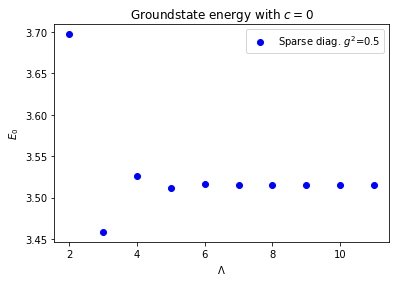

In [ ]:
import matplotlib.pyplot as plt

plt.plot(np.arange(2,12), gs, "bo", label=r"Sparse diag. $g^2$=0.5")
plt.title(r"Groundstate energy with $c=0$")
plt.xlabel(r"$\Lambda$")
plt.ylabel(r"$E_0$")
plt.legend(loc="best");

In [ ]:
print("lambda,energy")
for a,b in zip(np.arange(2,12), gs):
  print(f"{a},{b:.7f}")

lambda,energy
2,3.6972244
3,3.4584799
4,3.5262544
5,3.5121177
6,3.5165076
7,3.5153355
8,3.5157334
9,3.5156122
10,3.5156564
11,3.5156415
